In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Evaluation

from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("CollegePlace.csv")
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df["Stream"].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [5]:
data = pd.get_dummies(df["Stream"])
data

,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2961,0,0,0,0,1,0
2962,0,0,0,0,0,1
2963,0,0,0,0,1,0
2964,0,1,0,0,0,0


In [6]:
df.drop(["Stream"], axis=1, inplace=True)

In [7]:
df

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,1,8,1,1,1
1,21,Female,0,7,1,1,1
2,22,Female,1,6,0,0,1
3,21,Male,0,8,0,1,1
4,22,Male,0,8,1,0,1
...,...,...,...,...,...,...,...
2961,23,Male,0,7,0,0,0
2962,23,Male,1,7,1,0,0
2963,22,Male,1,7,0,0,0
2964,22,Male,1,7,0,0,0


In [8]:
df = pd.concat([df,data], axis=1)
df

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,Male,1,8,1,1,1,0,0,0,1,0,0
1,21,Female,0,7,1,1,1,0,1,0,0,0,0
2,22,Female,1,6,0,0,1,0,0,0,0,1,0
3,21,Male,0,8,0,1,1,0,0,0,0,1,0
4,22,Male,0,8,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,Male,0,7,0,0,0,0,0,0,0,1,0
2962,23,Male,1,7,1,0,0,0,0,0,0,0,1
2963,22,Male,1,7,0,0,0,0,0,0,0,1,0
2964,22,Male,1,7,0,0,0,0,1,0,0,0,0


In [9]:
df.drop(["Gender","Hostel"], axis=1, inplace=True)
df

,Age,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,8,1,1,0,0,0,1,0,0
1,21,0,7,1,1,0,1,0,0,0,0
2,22,1,6,0,1,0,0,0,0,1,0
3,21,0,8,1,1,0,0,0,0,1,0
4,22,0,8,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,0,0,0,1,0
2962,23,1,7,0,0,0,0,0,0,0,1
2963,22,1,7,0,0,0,0,0,0,1,0
2964,22,1,7,0,0,0,1,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            2966 non-null   int64
 1   Internships                    2966 non-null   int64
 2   CGPA                           2966 non-null   int64
 3   HistoryOfBacklogs              2966 non-null   int64
 4   PlacedOrNot                    2966 non-null   int64
 5   Civil                          2966 non-null   uint8
 6   Computer Science               2966 non-null   uint8
 7   Electrical                     2966 non-null   uint8
 8   Electronics And Communication  2966 non-null   uint8
 9   Information Technology         2966 non-null   uint8
 10  Mechanical                     2966 non-null   uint8
dtypes: int64(5), uint8(6)
memory usage: 133.4 KB


<AxesSubplot: >

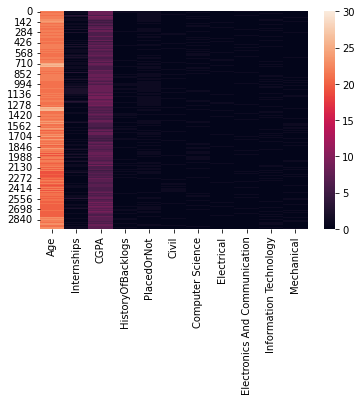

In [11]:
sns.heatmap(df)

##### Feature selection

In [12]:
df.head(1)

,Age,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,8,1,1,0,0,0,1,0,0


In [13]:
x = df.drop(["PlacedOrNot"],axis=1)
y = df["PlacedOrNot"]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [15]:
x_train

,Age,Internships,CGPA,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2545,20,0,7,0,0,0,0,0,1,0
1223,21,0,7,0,0,0,0,0,1,0
2197,21,1,6,1,0,0,0,0,0,1
2540,21,1,8,0,0,0,0,1,0,0
627,22,2,6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2136,19,0,5,0,0,0,1,0,0,0
2940,22,0,7,0,0,0,0,1,0,0
1334,25,1,7,0,0,1,0,0,0,0
1579,20,0,6,0,0,0,0,0,1,0


In [16]:
x_test

,Age,Internships,CGPA,HistoryOfBacklogs,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2105,20,0,6,0,0,0,0,0,1,0
568,22,0,7,1,0,0,1,0,0,0
1417,21,0,6,1,0,0,0,0,0,1
2047,20,1,6,0,0,1,0,0,0,0
993,22,1,7,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2085,22,1,7,0,1,0,0,0,0,0
2137,21,1,8,0,0,1,0,0,0,0
2200,21,0,7,0,1,0,0,0,0,0
965,22,0,8,1,0,0,1,0,0,0


##### Model Building

In [17]:
LoR_model = LogisticRegression()
LoR_model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = LoR_model.predict(x_test)
y_pred[10:21]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [19]:
y_test[10:21]

494     1
2337    0
1979    1
1500    1
1034    1
390     0
2134    1
699     1
2569    1
698     1
1817    0
Name: PlacedOrNot, dtype: int64

#### Evaluation

In [20]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[189,  74],
       [ 63, 268]], dtype=int64)

In [21]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [22]:
print(TP)
print(FP)
print(FN)
print(TN)

189
74
63
268


In [23]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy

0.7693602693602694

In [24]:
precision = TP/(TP+FP)
precision

0.7186311787072244

In [25]:
recall = TP/(TP+FN)
recall

0.75

In [26]:
f1_score = 2*(precision*recall) / (precision+recall)
f1_score

0.7339805825242719

#### Probablity

In [27]:
y_pred_prob = LoR_model.predict_proba(x_test)
y_pred_prob

array([[0.91670232, 0.08329768],
       [0.57610723, 0.42389277],
       [0.95027604, 0.04972396],
       ...,
       [0.7260047 , 0.2739953 ],
       [0.16405489, 0.83594511],
       [0.24018159, 0.75981841]])

In [28]:
y_pred_prob[:,1]

array([0.08329768, 0.42389277, 0.04972396, 0.13971214, 0.68115598,
       0.66117052, 0.23829765, 0.79065695, 0.89201892, 0.04431203,
       0.0781973 , 0.07415623, 0.79344523, 0.96563879, 0.23829765,
       0.06986128, 0.99004606, 0.89874231, 0.89874231, 0.20406032,
       0.77640888, 0.15129156, 0.8130474 , 0.81382385, 0.72343123,
       0.84112431, 0.46446293, 0.90124144, 0.46395206, 0.18387077,
       0.05168002, 0.23693796, 0.2430555 , 0.81382385, 0.73264646,
       0.8570171 , 0.96148828, 0.38574328, 0.19217073, 0.8130474 ,
       0.79237053, 0.53911037, 0.12201249, 0.77075903, 0.81723143,
       0.10674485, 0.62299288, 0.60785168, 0.75436462, 0.80229277,
       0.60076033, 0.89874231, 0.52675146, 0.09883132, 0.42439445,
       0.18289066, 0.15225783, 0.38623008, 0.91478144, 0.34350479,
       0.74695843, 0.20356338, 0.60785168, 0.60598699, 0.15616779,
       0.94778586, 0.59400453, 0.01514074, 0.78270979, 0.01072922,
       0.96814547, 0.81932074, 0.88621687, 0.72326787, 0.01210

In [29]:
fpr, tpr, thresh = roc_curve(y_test,y_pred_prob[:,1])

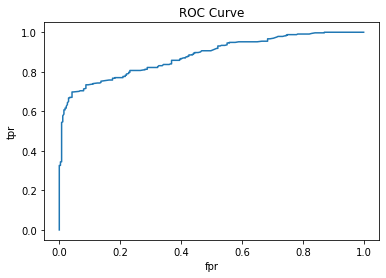

In [30]:
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot(fpr,tpr)

#### Testing on one row

In [31]:
df.head().T

,0,1,2,3,4
Age,22,21,22,21,22
Internships,1,0,1,0,0
CGPA,8,7,6,8,8
HistoryOfBacklogs,1,1,0,1,0
PlacedOrNot,1,1,1,1,1
Civil,0,0,0,0,0
Computer Science,0,1,0,0,0
Electrical,0,0,0,0,0
Electronics And Communication,1,0,0,0,0
Information Technology,0,0,1,1,0


In [50]:
Age = 90
Internships = 0
CGPA = 0
HistoryOfBacklogs = 50
Stream = "Civil"

In [51]:
z = np.zeros(len(x.columns))
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
z[0] = Age
z[1]=Internships
z[2]=CGPA
z[3]=HistoryOfBacklogs

In [53]:
x.columns

Index(['Age', 'Internships', 'CGPA', 'HistoryOfBacklogs', 'Civil',
       'Computer Science', 'Electrical', 'Electronics And Communication',
       'Information Technology', 'Mechanical'],
      dtype='object')

In [54]:
stream_index = np.where(x.columns==Stream)[0][0]
stream_index

4

In [55]:
z[stream_index]=1

In [56]:
z

array([90.,  0.,  0., 50.,  1.,  0.,  0.,  0.,  0.,  0.])

In [57]:
LoR_model.predict([z])

array([0], dtype=int64)

#### Pickle

In [40]:
import pickle

with open("CollegePlace.pkl", "wb") as f:
    pickle.dump(LoR_model,f)

#### Json

In [41]:
jfile = {"columns":list(x.columns)}
jfile

{'columns': ['Age',
  'Internships',
  'CGPA',
  'HistoryOfBacklogs',
  'Civil',
  'Computer Science',
  'Electrical',
  'Electronics And Communication',
  'Information Technology',
  'Mechanical']}

In [42]:
import json
with open("JsonFile.json", "w") as f:
    json.dump(jfile,f)